# Hypothesis testing

## Hypothesis and testing

 In statistical analysis, a hypothesis, is a claim or assertion either about the value of a single parameter or values of several parameters, or the form of the probability distribution of the population.

***For example:***
-  **Single parameter:** A manufacturer of a silicon wafer claims that using their new patented process, fewer than 5 defect in a 100 is achievable. (5 in 100 is probably the average failure rate)
- **Several parameters:** The manufacturer above is claiming that their method is significantly superior to old one i.e. failure rate now is significantly less than previous
- **Form of probability distribution:** Chip failure time is normally distributed.

*How do you verify or refute these claims? Thats what we will be discussing under hypothesis testing.*

In hypothesis testing, there are two contradictory scenarios; for instance one might claim that $\mu = 0.5$ and the other might be $\mu \neq 0.5$. To decide between these, we take some sample values based on which we make a decision.

### Analogy

 There is a familiar analogy to this in a criminal trial. One claim is the assertion that the ***accused individual is innocent***. In most judicial systems, this is the claim that is initially believed to be true. Only ***in the face of strong evidence to the contrary*** should the jury ***reject this claim in favor of the alternative assertion*** that the accused is guilty. In this sense, the ***claim of innocence is the favored or protected hypothesis, and the burden of proof is placed on those who believe in the alternative claim***.

### Writing out hypothesis

The null hypothesis, denoted by $H_0$ is the claim that is initially assumed to
be true (the “prior belief”). The alternative hypothesis, denoted by $H_a$, is the assertion that is contradictory to $H_0$.

$H_0$ will be rejected in favor of $H_a$ only if the sample evidence suggests that $H_0$ is false. If the sample does not strongly contradict $H_0$, we will continue to believe in the plausibility of the null hypothesis. The two possible conclusions from a hypothesis-testing analysis are thus: reject $H_0$ or fail to reject $H_0$.

The word ***null*** means ***of no value, effect, or consequence***, which suggests that $H_0$ should be identified with the hypothesis of no change (from current opinion), no difference, no improvement, and so on.

Our example above of *Single parameter* can be expressed as:
- Null Hypothesis ($H_0$): p = 0.05
- Alternate Hypothesis ($H_a$): p < 0.05

*Note; we used $H_0$: p = 0.05 instead of p >= 0.05. But it turns out, any reasonable decision procedure for deciding between $H_0$: p = 0.05 & $H_a$: p < 0.05 will also be reasonable for deciding between the claim $H_0$: p >= 0.05 & $H_a$: p < 0.05.*

A ***test of hypotheses*** is a method for using sample data to decide whether the null hypothesis should be rejected.

### Simulating probability

In [7]:
# simulate probability:
# objective probability: probability if the proportion of occurance as number of experiment increases to infinity

# randomly sample array of values from normal distribution with mean 0 and std 1
# find probability for occurance of values say less than -2
# find probability for occurance of values say larger than 2

import numpy as np

def get_std_norm_cdf(x, num_experiments = 1000000):
  experiment_values = numpy.random.normal(loc=0, scale = 1,size = num_experiments)
  return (experiment_values < x).sum() / num_experiments

In [3]:
get_std_norm_cdf(2)

np.float64(0.97731)

In [4]:
def get_zscore(x, mean_, std_):
  return (x - mean_)/ std_

In [5]:
def get_cdf(x, distribution_func, args : dict, samples = 1000000):
  p=0
  num_samples = 1000
  sample_size = samples // num_samples
  for i in range(num_samples):
    rand_samples = distribution_func(**args, size = sample_size)
    p += (rand_samples < x).sum() / sample_size
  return p/num_samples

def get_cdf_normal(x, mean_=0, std_=1):
  return get_cdf(x, numpy.random.normal, {'loc': mean_, 'scale': std_})

test_x = 0

print("CDF: ", get_cdf_normal(test_x, 0, 1))

CDF:  0.5010799999999991


In [6]:
# what does cdf say?
# what values are at least as contradictory as -2 to H0 = 0?
# what is their chance of occurance?
    
# Can we get a value (say -100.1) while sampling from the above standard normal distribution?

In [18]:
# data = np.random.normal(loc=10, scale=10 , size=400)


population = np.random.exponential(scale=10, size=40)



<Axes: ylabel='Count'>

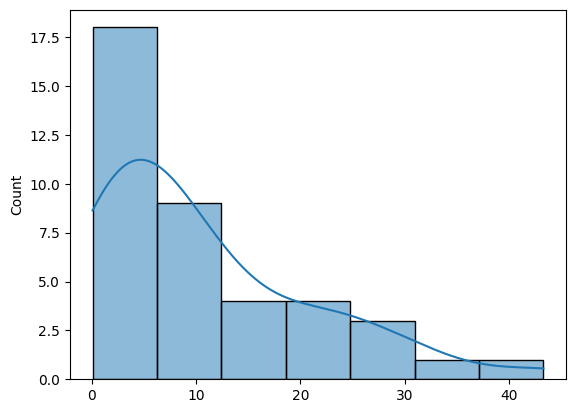

In [19]:
import seaborn as sns


sns.histplot(population, kde=True)

In [29]:
import random

population = np.random.exponential(10, 10000)

sample_means = [ np.mean(random.choice(population, size=40, replace=False)) for i in range(500)]

TypeError: mean() missing 1 required positional argument: 'a'

In [31]:
import numpy as np

# Generate the population from an exponential distribution
population = np.random.exponential(scale=10, size=10000)

# Calculate sample means using numpy's random.choice
sample_means = [np.mean(np.random.choice(population, size=40, replace=False)) for i in range(500)]

print(sample_means[:10])  # Print the first 10 sample means


[np.float64(9.401139210585296), np.float64(10.122298251113534), np.float64(9.834173577241588), np.float64(12.093867748847092), np.float64(8.884020651717567), np.float64(8.22668701028285), np.float64(8.929323931674693), np.float64(8.945643565229897), np.float64(10.710138217465783), np.float64(10.10142126760472)]


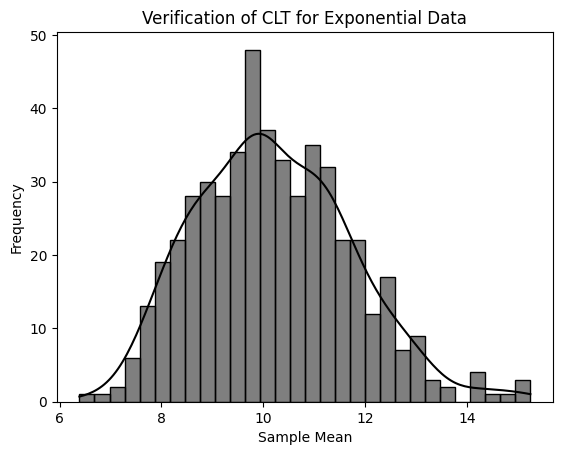

In [32]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


# Plot the distribution of sample means
sns.histplot(sample_means, bins=30, kde=True, color='black')




plt.title('Verification of CLT for Exponential Data')
plt.xlabel('Sample Mean')
plt.ylabel('Frequency')
plt.show()


In [52]:
sample_data = [6.91, 6.62, 8.45, 9.10, 11.05, 3.47, 12.47 , 2.02, 9.88, 5.53]


# std_population = 1, mean= 9
sample_data = np.array(sample_data)


sample_mean = np.mean(sample_data)


z_score = (sample_mean -9) * np.sqrt(len(sample_data)) / 2




z_score

np.float64(-2.2926513036220753)

In [67]:
import math 
import numpy as np
from statsmodels.stats.weightstats import ztest
from scipy.stats import norm
import stats

# Sample data
sample_data = [6.91, 6.62, 8.45, 9.10, 11.05, 3.47, 12.47 , 2.02, 9.88, 5.53]
# Population mean under the null hypothesis
population_mean = 9
# Population standard deviation
population_std = 2

# Method 1 : Using Z-score

sample_mean = np.mean(sample_data)
sample_size = np.count_nonzero(sample_data)


alpha = 0.05
z_score = (sample_mean-population_mean)/(population_std/math.sqrt(sample_size))
critical_value = 1.96 # from z table


# Calculate p-value for Two-Tailed Test
p_value_two_tailed = 2 * (1 - stats.norm.cdf(abs(z_score)))

if(z_score>(-2) and z_score<2):
    print('Null hypothesis is accepted!')
else:
    print('Null hypothesis is rejected. \nAlternate hypothesis is accepted!')
    

print(z_score)
  

ModuleNotFoundError: No module named 'stats'

In [65]:
  
    
# Method 2: Using built in function of ztest

ztest_score, pval = ztest(sample_data,value=population_mean,alternative='larger')
print('Z-test Score:',ztest_score,'\nP-value:',pval)
if(pval>alpha):
     print('Null hypothesis is accepted!')
else:
    print('Null hypothesis is rejected. \nAlternate hypothesis is accepted!')

Z-test Score: -1.3918307636680816 
P-value: 0.9180131741013107
Null hypothesis is accepted!
